In [1]:
import pandas as pd
import numpy as np

# Import dataset

In [2]:
dataframe = pd.read_csv('processed_reviews_split_surnamesRSTU_minimal.csv')

In [3]:
dataframe.head()

,review_id,text,confidence_score,review_score,acceptance_status
0,iclr_review_0000,Selective Self-Training for semi-supervised Le...,4.0,5.0,Reject
1,iclr_review_0001,Time-Agnostic Prediction: Predicting Predictab...,3.0,7.0,Accept
2,iclr_review_0002,Policy Optimization In the Face of Uncertainty...,NaN,1.0,Reject
3,iclr_review_0003,Adversarial Learning for Semi-Supervised Seman...,4.0,5.0,Reject
4,iclr_review_0004,Analysis and Interpretation of Deep CNN Repres...,NaN,3.0,Reject


# Checking null values

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          6118 non-null   object 
 1   text               6034 non-null   object 
 2   confidence_score   3306 non-null   float64
 3   review_score       6118 non-null   float64
 4   acceptance_status  5733 non-null   object 
dtypes: float64(2), object(3)
memory usage: 239.1+ KB


In [5]:
dataframe.isnull().any().any()

True

In [6]:
dataframe.isnull().sum().sum()

3281

# Dropping null vlaues

In [7]:
dataframe=dataframe.dropna()

In [8]:
dataframe.isnull().any().any()

False

In [9]:
dataframe.head()

,review_id,text,confidence_score,review_score,acceptance_status
0,iclr_review_0000,Selective Self-Training for semi-supervised Le...,4.0,5.0,Reject
1,iclr_review_0001,Time-Agnostic Prediction: Predicting Predictab...,3.0,7.0,Accept
3,iclr_review_0003,Adversarial Learning for Semi-Supervised Seman...,4.0,5.0,Reject
6,iclr_review_0006,Distilled Agent DQN for Provable Adversarial R...,2.0,4.0,Reject
7,iclr_review_0007,Monge-Amp\`ere Flow for Generative Modeling. ....,3.0,6.0,Reject


# Converting string to category

In [10]:
import numpy as np
dataframe['review_id'] = dataframe['review_id'].astype("category").cat.codes
dataframe['text'] = dataframe['text'].astype("category").cat.codes
dataframe['acceptance_status'] = dataframe['acceptance_status'].astype("category").cat.codes

In [11]:
dataframe.head()

,review_id,text,confidence_score,review_score,acceptance_status
0,0,2422,4.0,5.0,1
1,1,2715,3.0,7.0,0
3,2,177,4.0,5.0,1
6,3,756,2.0,4.0,1
7,4,1795,3.0,6.0,1


# Splitting the dataset

In [12]:
from sklearn.model_selection import train_test_split
X = dataframe[['review_id', 'text', 'confidence_score', 'review_score']]
Y = dataframe[['acceptance_status']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)

In [13]:
X_train

,review_id,text,confidence_score,review_score
1850,982,152,4.0,7.0
4623,2457,1820,4.0,5.0
5346,2836,1169,4.0,6.0
4864,2591,1883,5.0,4.0
5712,3032,1730,4.0,8.0
...,...,...,...,...
1815,960,216,3.0,4.0
5797,3085,1831,3.0,7.0
3249,1716,2259,5.0,4.0
3083,1635,1725,4.0,6.0


In [14]:
X_test

,review_id,text,confidence_score,review_score
1261,687,2180,3.0,6.0
521,300,2456,3.0,5.0
1577,834,629,5.0,7.0
3483,1853,2746,4.0,5.0
4066,2171,2140,4.0,8.0
...,...,...,...,...
2045,1091,792,3.0,5.0
3125,1654,1667,4.0,7.0
2837,1513,106,4.0,5.0
5237,2786,1105,4.0,4.0


In [15]:
Y_train

,acceptance_status
1850,0
4623,1
5346,0
4864,1
5712,0
...,...
1815,1
5797,0
3249,1
3083,0


In [38]:
Y_test

,acceptance_status
1261,0
521,0
1577,0
3483,1
4066,0
...,...
2045,1
3125,1
2837,1
5237,1


# Random forest alorithm

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
forest = RandomForestClassifier()

In [19]:
forest.fit(X_train, Y_train)

<ipython-input-19-6f840e966235>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, Y_train)


RandomForestClassifier()

In [20]:
y_pred = forest.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
RandomForestClassifier=accuracy_score(Y_test, y_pred)
RandomForestClassifier

0.7528779739063699

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [23]:
print('Precision: %.3f' % precision_score(Y_test, y_pred))

Precision: 0.788


In [24]:
print('Recall: %.3f' % recall_score(Y_test, y_pred))

Recall: 0.801


In [25]:
print('F1 Score: %.3f' % f1_score(Y_test, y_pred))

F1 Score: 0.794


# Desicision tree

In [26]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [27]:
y_pred_decisiontree = dtc.predict(X_test)

In [28]:
DecisionTree=accuracy_score(Y_test, y_pred_decisiontree)
DecisionTree

0.70376055257099

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [30]:
print('Precision: %.3f' % precision_score(Y_test, y_pred_decisiontree))

Precision: 0.743


In [31]:
print('Recall: %.3f' % recall_score(Y_test, y_pred_decisiontree))

Recall: 0.768


In [32]:
print('F1 Score: %.3f' % f1_score(Y_test, y_pred_decisiontree))

F1 Score: 0.756


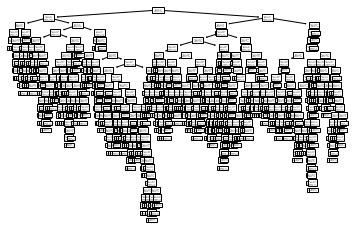

In [33]:
tree.plot_tree(dtc);

In [34]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor.fit(X, Y) 

<ipython-input-34-bb71f36fb786>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


RandomForestRegressor(random_state=0)

In [35]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RandomForestRegressor()

In [36]:
len(regressor.estimators_)

100

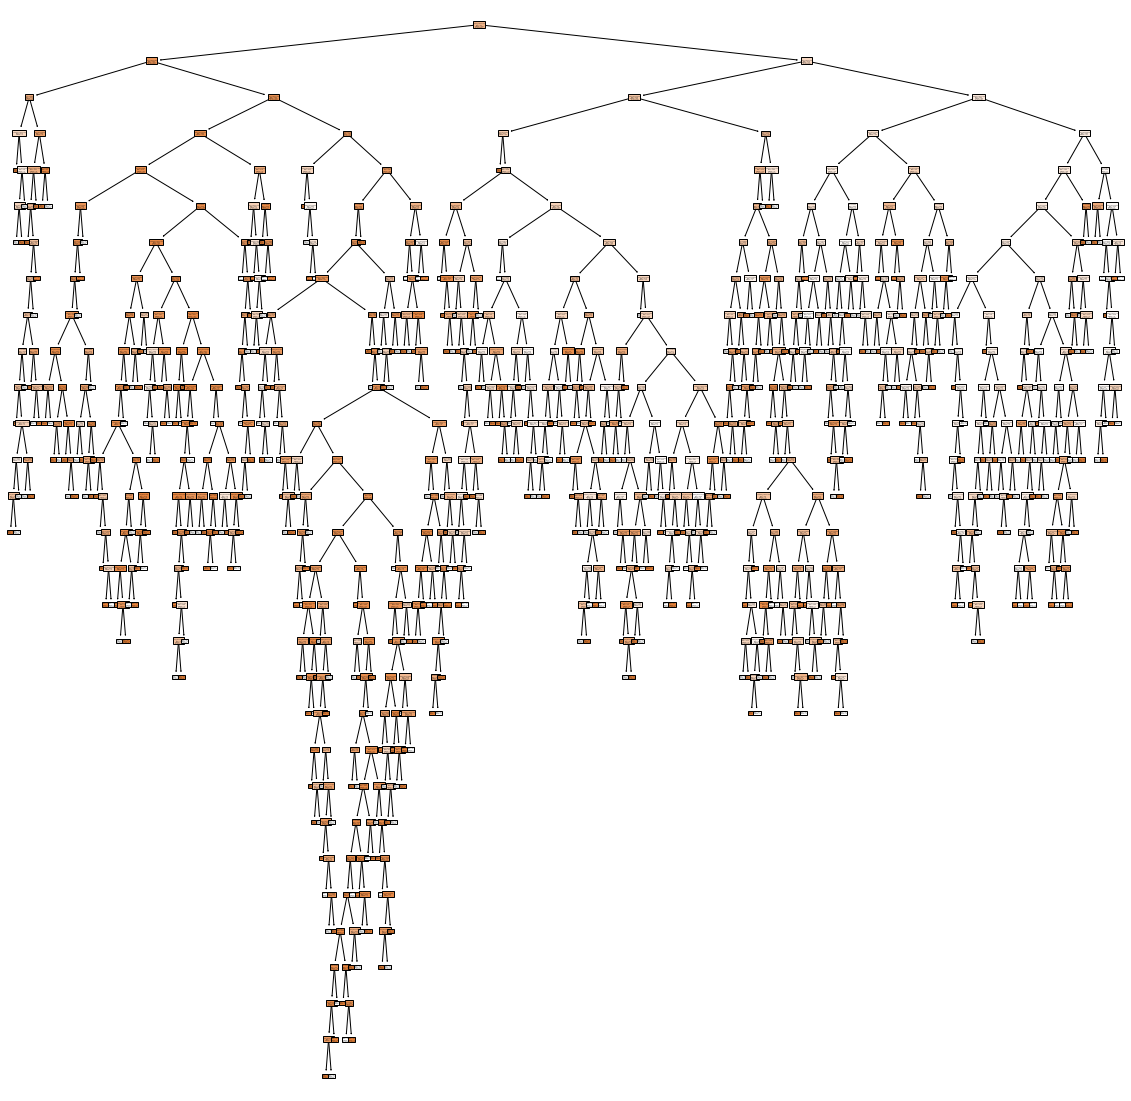

In [37]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(regressor.estimators_[0], feature_names=X.columns, filled=True)